<a href="https://colab.research.google.com/github/qazalkz/ML_step_by_step/blob/main/petrol_consumption___Regression_multi_without_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import SGDRegressor

# BASIC Reading file

In [75]:
df = pd.read_csv("/content/drive/MyDrive/machine learning/petrol_consumption.csv")
df.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


In [76]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [77]:
df.rename(columns={'Petrol_tax':'p_tax','Average_income':'A_inc','Paved_Highways':'p_highway','Population_Driver_licence(%)':'p_d_lic','Petrol_Consumption':'p_cons' }, inplace=True)

In [78]:
df.columns

Index(['p_tax', 'A_inc', 'p_highway', 'p_d_lic', 'p_cons'], dtype='object')

In [79]:
df.describe()

,p_tax,A_inc,p_highway,p_d_lic,p_cons
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   p_tax      48 non-null     float64
 1   A_inc      48 non-null     int64  
 2   p_highway  48 non-null     int64  
 3   p_d_lic    48 non-null     float64
 4   p_cons     48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [81]:
len(df.columns)

5

In [82]:
# X = df[['p_tax', 'A_inc', 'p_highway', 'p_d_lic']]
X = df.iloc[:,:-1]
print(X.head(3))
print("--------------------------------")
print("X shape is :",X.shape)

   p_tax  A_inc  p_highway  p_d_lic
0    9.0   3571       1976    0.525
1    9.0   4092       1250    0.572
2    9.0   3865       1586    0.580
--------------------------------
X shape is : (48, 4)


In [83]:
#  y = df['p_cons']
y = df.iloc[:,-1]
print(y.head(3))
print("--------------------------------")
print("y shape is :",y.shape)

0    541
1    524
2    561
Name: p_cons, dtype: int64
--------------------------------
y shape is : (48,)


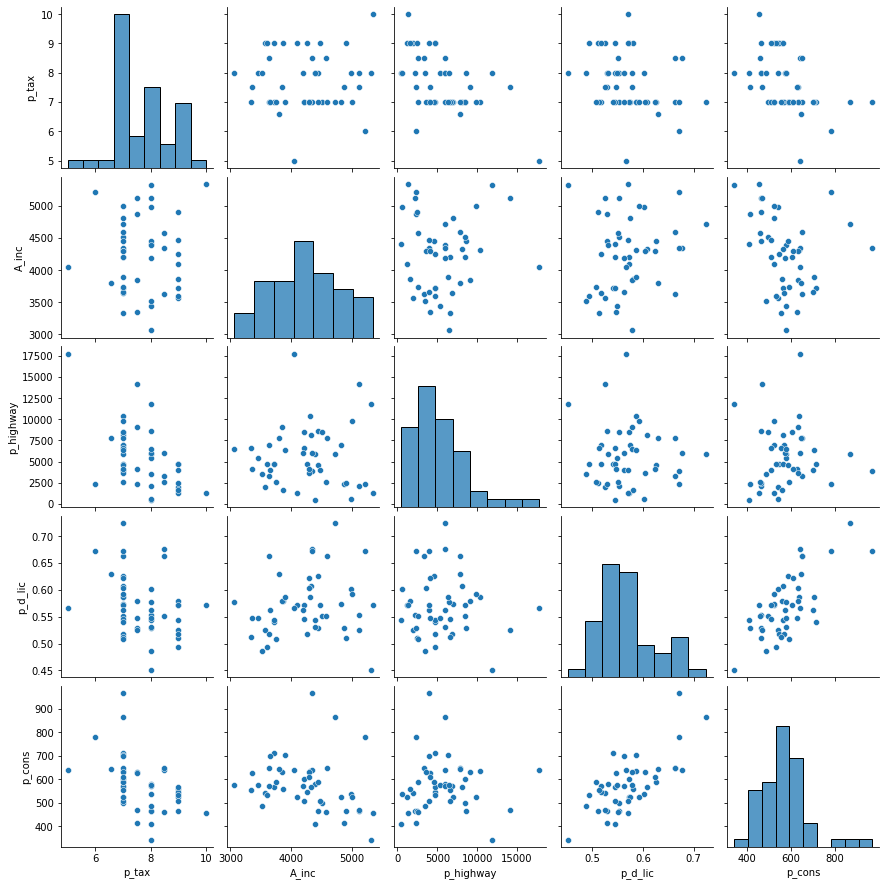

In [84]:
sns.pairplot(df)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

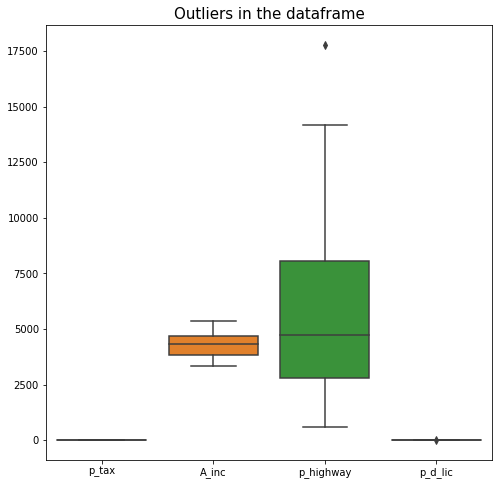

In [88]:
plt.figure(figsize=(8,8), facecolor='w')
plt.title('Outliers in the dataframe', fontsize = 15)
sns.boxplot(data = X_train)

In [89]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]
425.59933220324206


In [91]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)

           Coefficient
p_tax       -40.016660
A_inc        -0.065413
p_highway    -0.004741
p_d_lic    1341.862121


In [92]:
y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
print(df_pred)

    Actual   Predicted
29     534  469.391989
4      410  545.645464
26     577  589.668394
30     571  569.730413
32     577  649.774809
37     704  646.631164
34     487  511.608148
40     587  672.475177
7      467  502.074782
10     580  501.270734


In [93]:
print("MAE : ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE :  56.8222474789647
MSE :  4666.344787588362
RMSE :  68.31064915215168


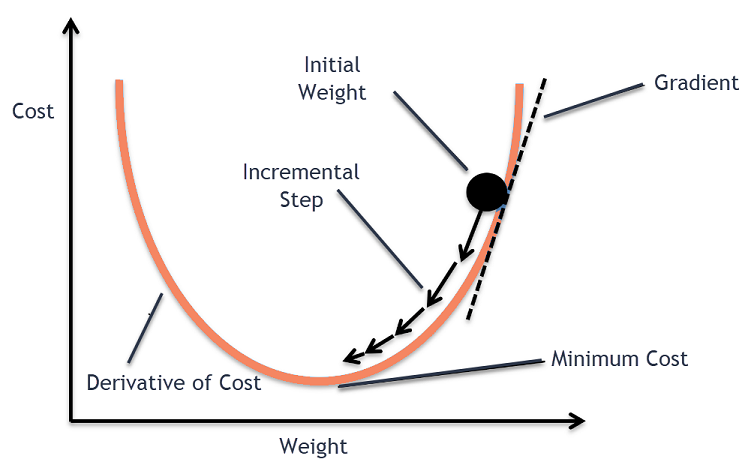

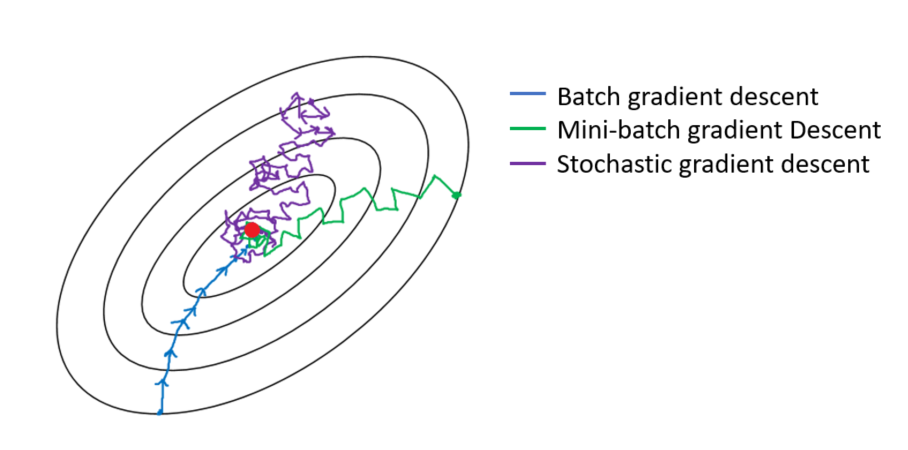

An **epoch** is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into **batches** (especially when the amount of data is very large).

In **Gradient Descent** or **Batch Gradient Descent**, we use the whole training data per **epoch** whereas, in **Stochastic Gradient Descent**, we use only single training example per epoch and **Mini-batch Gradient Descent** lies in between of these two extremes, in which we can use a **mini-batch(small portion)** of training data per **epoch**, thumb rule for selecting the size of mini-batch is in power of 2 like 32, 64, 128 etc

learning_rate.svg

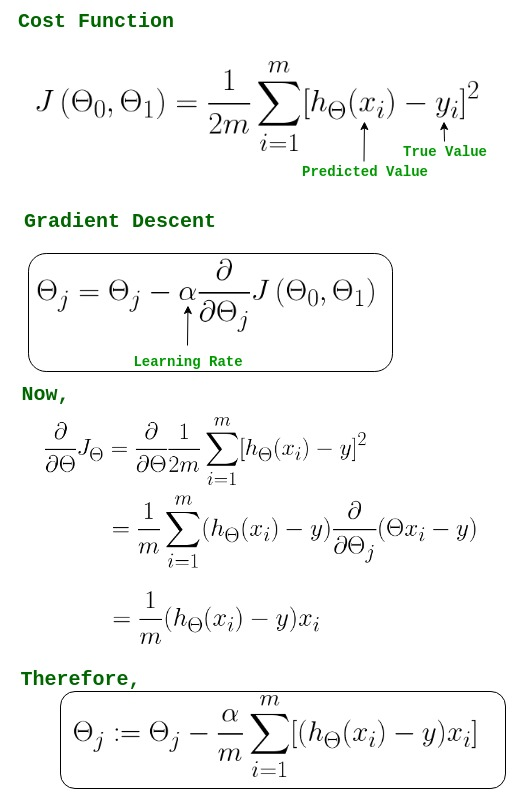

# مشتق  گیری جزئی
# partial derivative

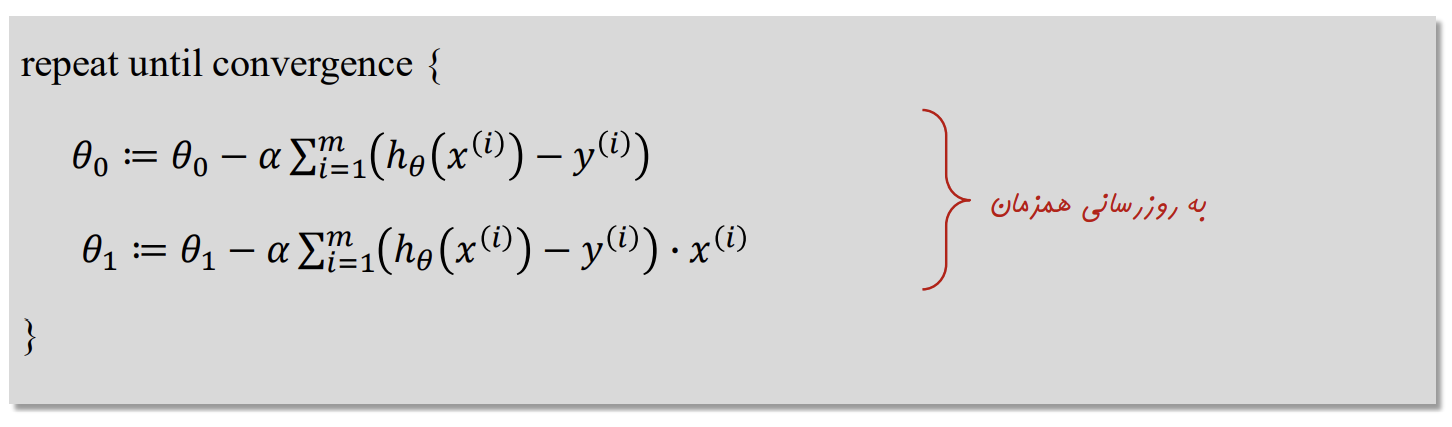

# Normalizing Data

In [94]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# SGDRegressor 
رگرسیون معمولی ار فرمول بسته محاسبه رگرسیون استفاده میکنه که طبق فرمول آماری هست
اما برای زمانی که تعداد پارامترها خیلی زیاد باشه محاسبه با رگرسیون معمول خیلی زمانبر هست. بنابراین از رگرسیون با گرادیان کاهشی استفاده میشه که به مرور الگوریتم رو بهینه میکنه




In [95]:
sgd_regressor = SGDRegressor(max_iter=1000, random_state= 0 , eta0=0.01)          #max_iter= 1000 by default------random_state= 0  no shuffling
sgd_regressor.fit(X_train, y_train)                         # eta0=0.01  learning rate
sgd_coeff_df = pd.DataFrame(sgd_regressor.coef_, X.columns, columns=["Coefficient SGD"])
print(sgd_coeff_df)
print("********************")
print(coeff_df)
print("********************")
print("epochs : {}".format(sgd_regressor.n_iter_))
print("number of update : {}".format(sgd_regressor.t_))

           Coefficient SGD
p_tax           -40.356600
A_inc           -35.094999
p_highway       -17.562186
p_d_lic          75.663677
********************
           Coefficient
p_tax       -40.016660
A_inc        -0.065413
p_highway    -0.004741
p_d_lic    1341.862121
********************
epochs : 241
number of update : 9159.0
